In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Accumen challenge/predictions_final.csv",
                   parse_dates=['Date'],
                   index_col=['Date'])


In [3]:
data.head()

,Predictions,RSI,MCAD,EMA50,EMA200,EMA26,EMA13
Date,,,,,,,
2019-08-30,114.077,NaN,0.000000,114.077000,114.077000,114.077000,114.077000
2019-09-03,115.210,NaN,0.090382,114.121431,114.088274,114.160926,114.238857
2019-09-04,114.033,NaN,0.066272,114.117964,114.087724,114.151450,114.209449
2019-09-05,109.446,NaN,-0.319287,113.934749,114.041537,113.802898,113.528956
2019-09-06,120.325,NaN,0.250115,114.185347,114.104059,114.286017,114.499820


In [4]:
data.tail()

,Predictions,RSI,MCAD,EMA50,EMA200,EMA26,EMA13
Date,,,,,,,
2023-03-20,420.879,47.347025,-2.854764,424.803370,423.511718,425.861759,423.420968
2023-03-21,408.976,42.046067,-3.762581,424.182689,423.367084,424.610962,421.357401
2023-03-22,410.799,43.096850,-4.285532,423.657838,423.242028,423.587854,419.849058
2023-03-23,417.341,46.823016,-4.124544,423.410119,423.183312,423.125124,419.490764
2023-03-24,421.410,49.057454,-3.626817,423.331683,423.165667,422.998078,419.764941


In [5]:
start_date = '2019-08-30'
end_date = '2023-03-24'

In [6]:
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [7]:
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

,Predictions,RSI,MCAD,EMA50,EMA200,EMA26,EMA13
Date,,,,,,,
2019-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


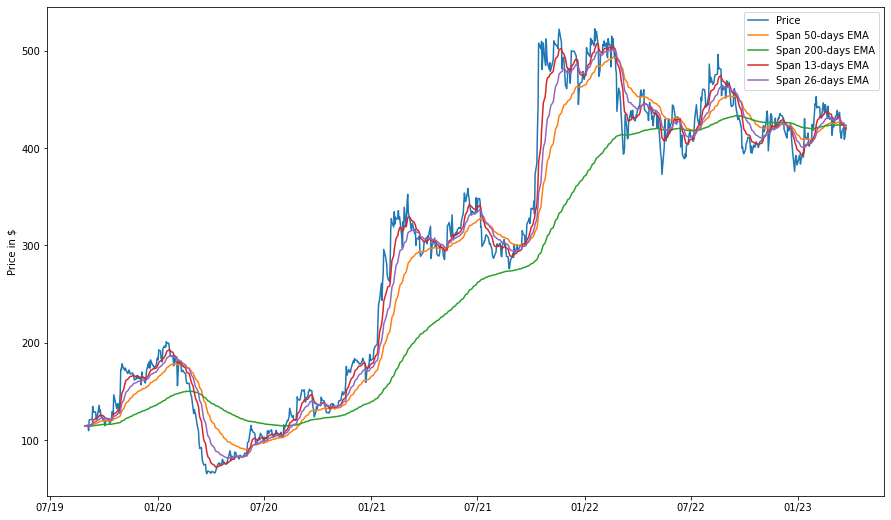

In [8]:
ema_short = data.ewm(span=50, adjust=False).mean()
ema_short2 = data.ewm(span=200,adjust=False).mean()
ema_13 = data.ewm(span = 13, adjust = False).mean()
ema_26 = data.ewm(span = 26, adjust = False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date, 'Predictions'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Predictions'], label = 'Span 50-days EMA')
ax.plot(ema_short2.loc[start_date:end_date, :].index, ema_short2.loc[start_date:end_date, 'Predictions'], label = 'Span 200-days EMA')
ax.plot(ema_13.loc[start_date:end_date, :].index, ema_13.loc[start_date:end_date, 'Predictions'], label = 'Span 13-days EMA')
ax.plot(ema_26.loc[start_date:end_date, :].index, ema_26.loc[start_date:end_date, 'Predictions'], label = 'Span 26-days EMA')


ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

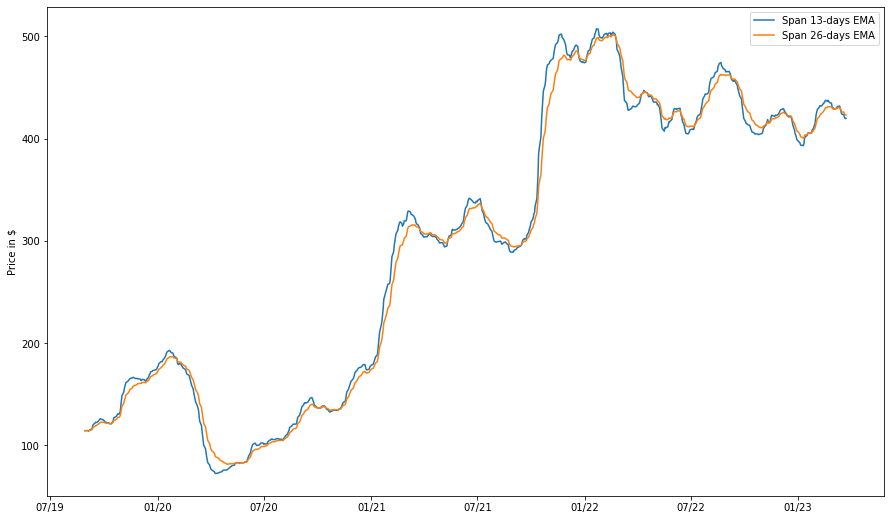

In [9]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(ema_13.loc[start_date:end_date, :].index, ema_13.loc[start_date:end_date, 'Predictions'], label = 'Span 13-days EMA')
ax.plot(ema_26.loc[start_date:end_date, :].index, ema_26.loc[start_date:end_date, 'Predictions'], label = 'Span 26-days EMA')
ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

In [10]:
ema_13_df = pd.DataFrame(ema_13)
ema_13_df

,Predictions,RSI,MCAD,EMA50,EMA200,EMA26,EMA13
Date,,,,,,,
2019-08-30,114.077000,NaN,0.000000,114.077000,114.077000,114.077000,114.077000
2019-09-03,114.238857,NaN,0.012912,114.083347,114.078611,114.088989,114.100122
2019-09-04,114.209449,NaN,0.020535,114.088293,114.079912,114.097912,114.115741
2019-09-05,113.528956,NaN,-0.028011,114.066358,114.074430,114.055767,114.031914
2019-09-06,114.499820,NaN,0.011721,114.083356,114.078663,114.088660,114.098758
...,...,...,...,...,...,...,...
2023-03-20,423.420968,47.740511,-0.140129,425.251716,423.517541,428.114797,428.158416
2023-03-21,421.357401,46.927019,-0.657622,425.098998,423.496047,427.614249,427.186843
2023-03-22,419.849058,46.379852,-1.175895,424.893118,423.459759,427.039050,426.138588


In [11]:
ema_13_df.to_csv("EMA13_new.csv")

In [12]:
ema_26_df = pd.DataFrame(ema_26)
ema_26_df.to_csv("EMA26.csv")